# Testing LLMs: why is it hard?

- Rapidly evolving field with no established best practices yet
- Two key questions for testing language models: what data to test them on and what metrics to compute on that data
- Building evaluation sets is hard - you often have to do it incrementally, starting from the beginning while prototyping the model
- You have to add interesting examples to the evaluation dataset, focusing on hard examples where the model struggles and different examples that aren't common in the dataset
- You can utilize a language model to help generate diverse test cases by creating prompts for the tasks you're trying to solve, but it is not an ideal approach.
- Considering the concept of test coverage, aiming for an evaluation set that covers the types of tasks users will actually perform in the system is hard
- To be effective, test reliability should measure the difference between online and offline performance, ensuring that metrics are relevant to real-world user experiences.

# LLM Evaluation Strategy
Something I use.

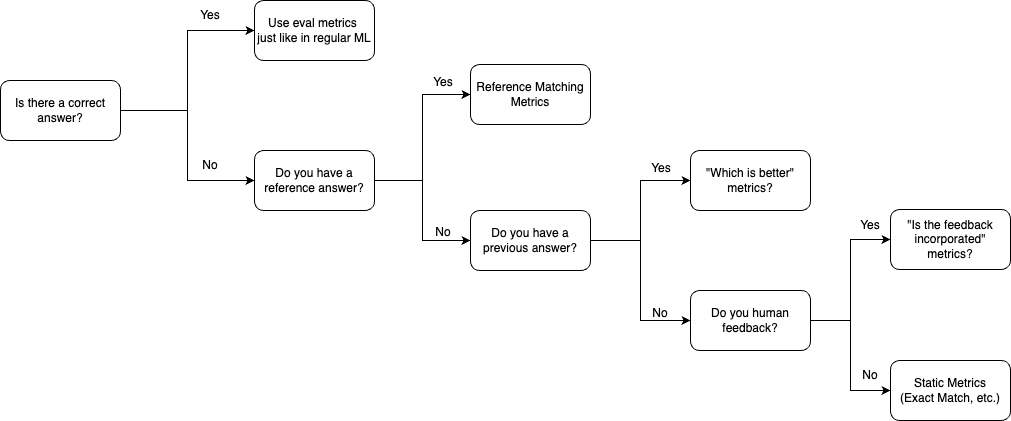

- Evaluation metrics for language models depend on the availability of a correct answer, reference answer, previous answer, or human feedback.
- If there's a correct answer, use metrics like accuracy.
- With a reference answer, employ reference matching metrics like semantic similarity or factual consistency.
- If there's a previous answer, ask another language model which answer is better.
- When human feedback is available, check if the answer incorporates the feedback.
- If none of these options apply, verify output structure or ask the model to grade the answer.
- Although automatic evaluation is desirable for faster experimentation, manual checks still play an essential role.

# Automated Benchmarks

Automated benchmarks usually works the following way: you'd like to know how well your model performs on something. This something can be a well-defined concrete task, such as `How well can my model classify spam from non spam emails?`, or a more abstract and general capability, such as `How good is my model at math?`.

From this, you construct an evaluation, using:

- a dataset, made of samples.
  - These samples contain an input for the model, sometimes coupled with a reference to compare the model's output with.
  - Samples are usually designed to try to emulate what you want to test the model on: for example, if you are looking at email classification, you create a dataset of spam and non spam emails, try to include some hard edge cases, etc.
- a metric.
  - The metric is a way to score your model. Example: how accurately can your model classify spam (score of well classified sample = 1, badly classified = 0).
  - Metrics use your model's outputs to do this scoring. In the case of LLMs, people mostly consider two kind of outputs:
    - the text generated by the model following the input (generative evaluation)
    - the log-probability of one or several sequences provided to the model (multiple-choice evaluations, sometimes called MCQA, or perplexity evaluations)

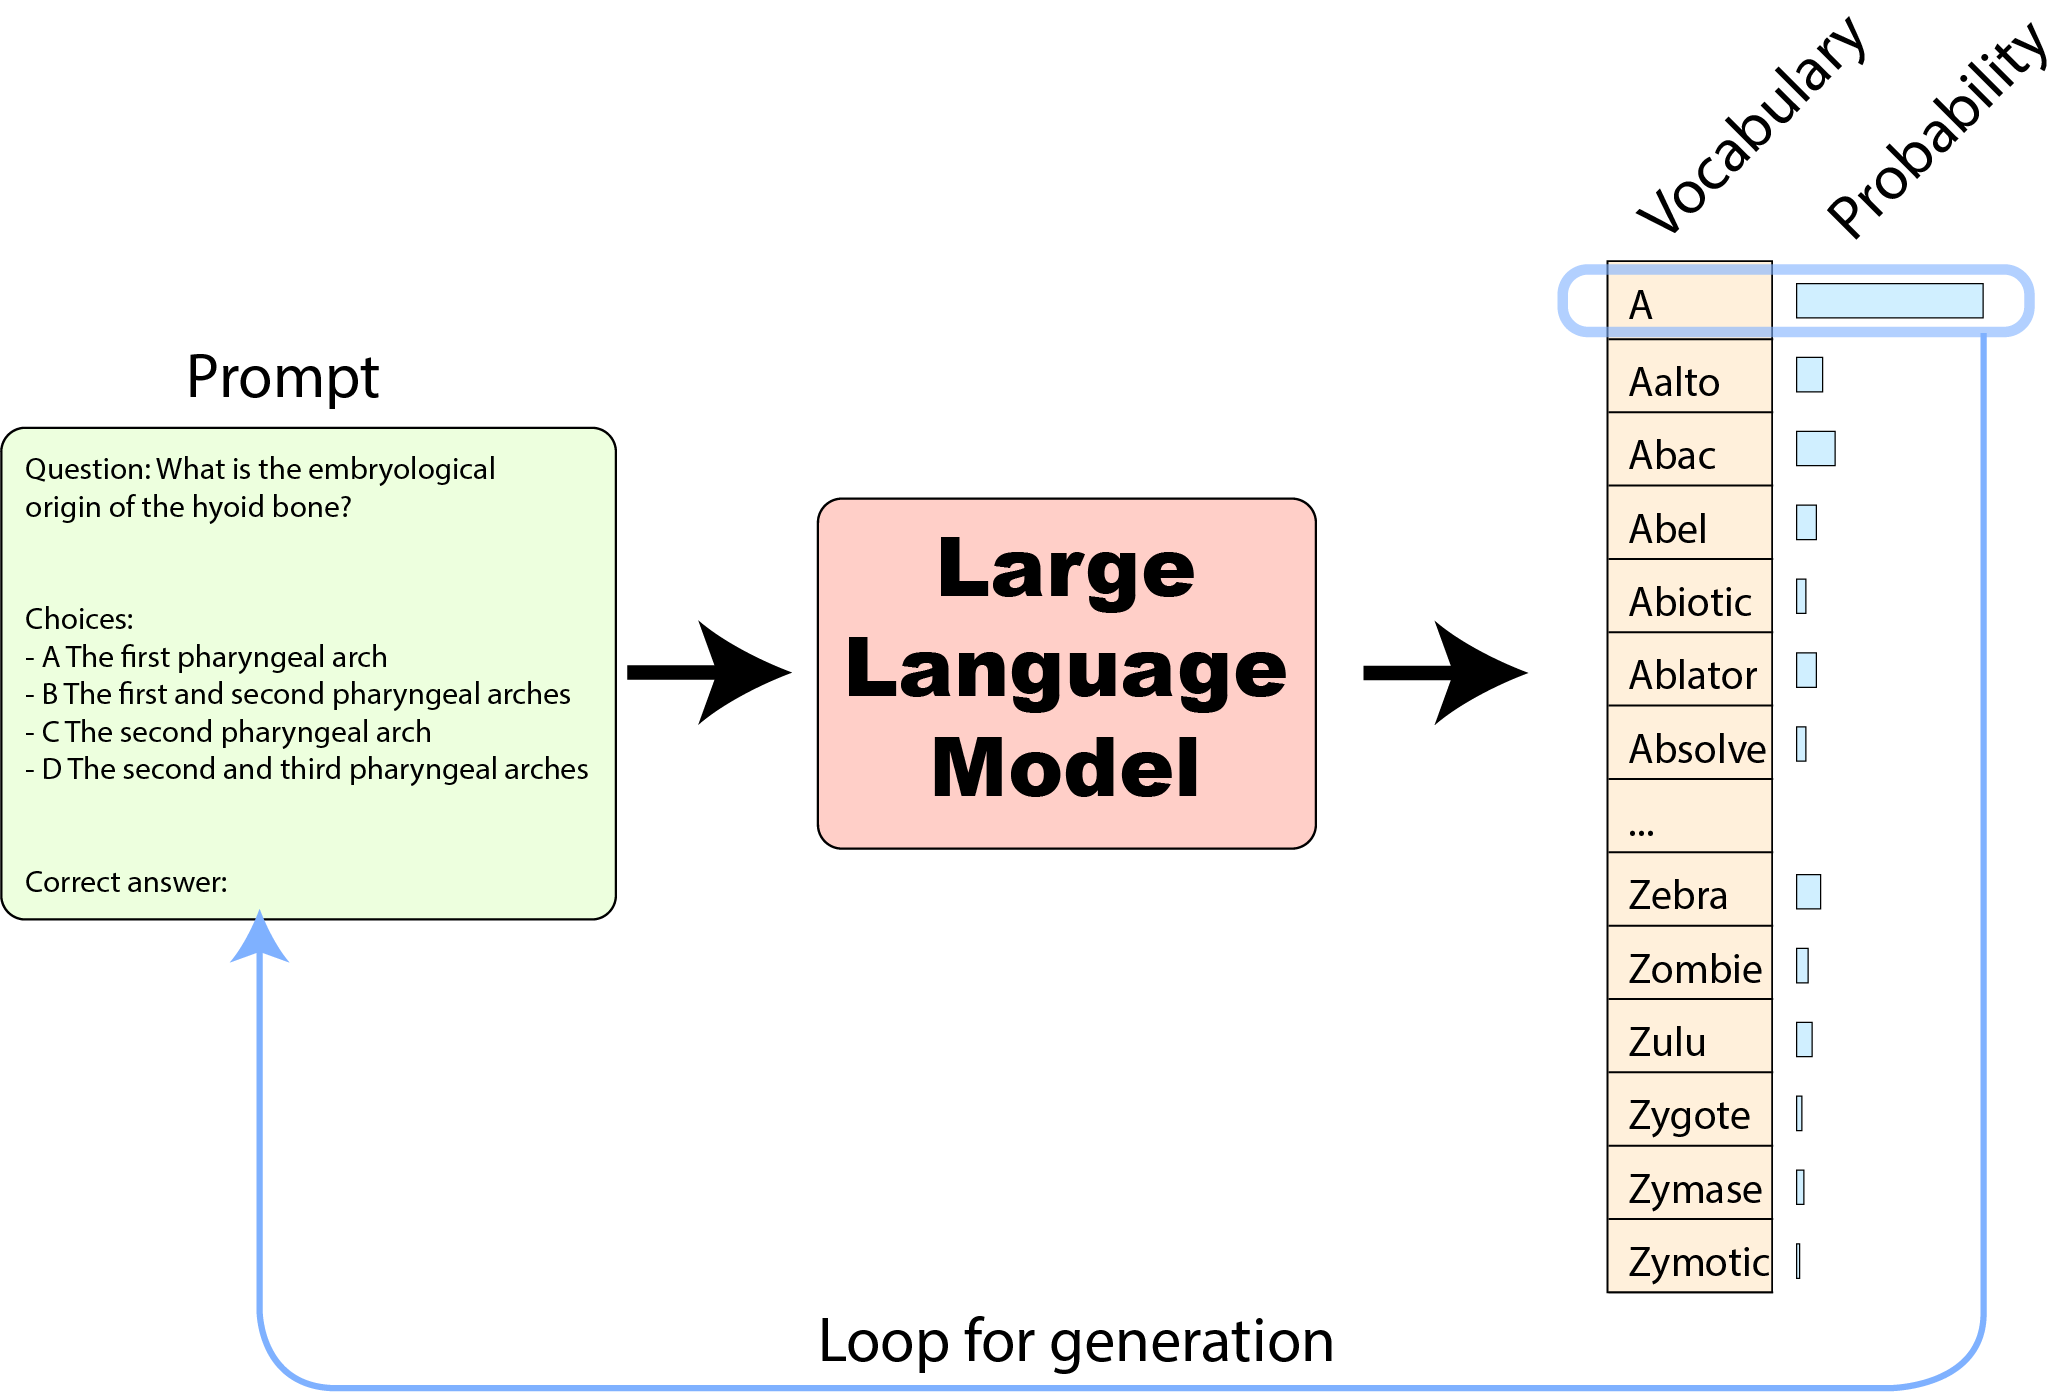

*Source: Hugging Face*

From an input text, the LLM generates a probability distribution of the most likely next tokens over all the vocabulary. To get a continued generation, we can take the most probable token (give or take some added randomness to get more interesting outputs) as the next one, then repeat the operation, using the new token as the end of the prompt, etc. (Auto-regressive prediction).

Automatic LLM evaluations mostly fall into 2 categories:

- Given a prompt and one (or several) answers, what is probability of said answer(s) for my model?
- Given a prompt, what text does my model generate?

## Log-likelihood evaluations
For log-likelihood evaluations, we want the conditional probability of one or several choices given a prompt - in other terms, what is the likelihood to get a specific continuation given an input? So:

- we concatenate each choice with the prompt, and pass them to our LLM, which outputs the logits of each token depending on the previous ones
- we only keep the last logits (associated with the choice tokens), and apply a log softmax to get log-probabilities (where the range is [-inf, 0] instead of [0-1])
- we then sum all individual tokens log probabilities to get the overall choice log probability
- we can finally apply a normalization based on choice length

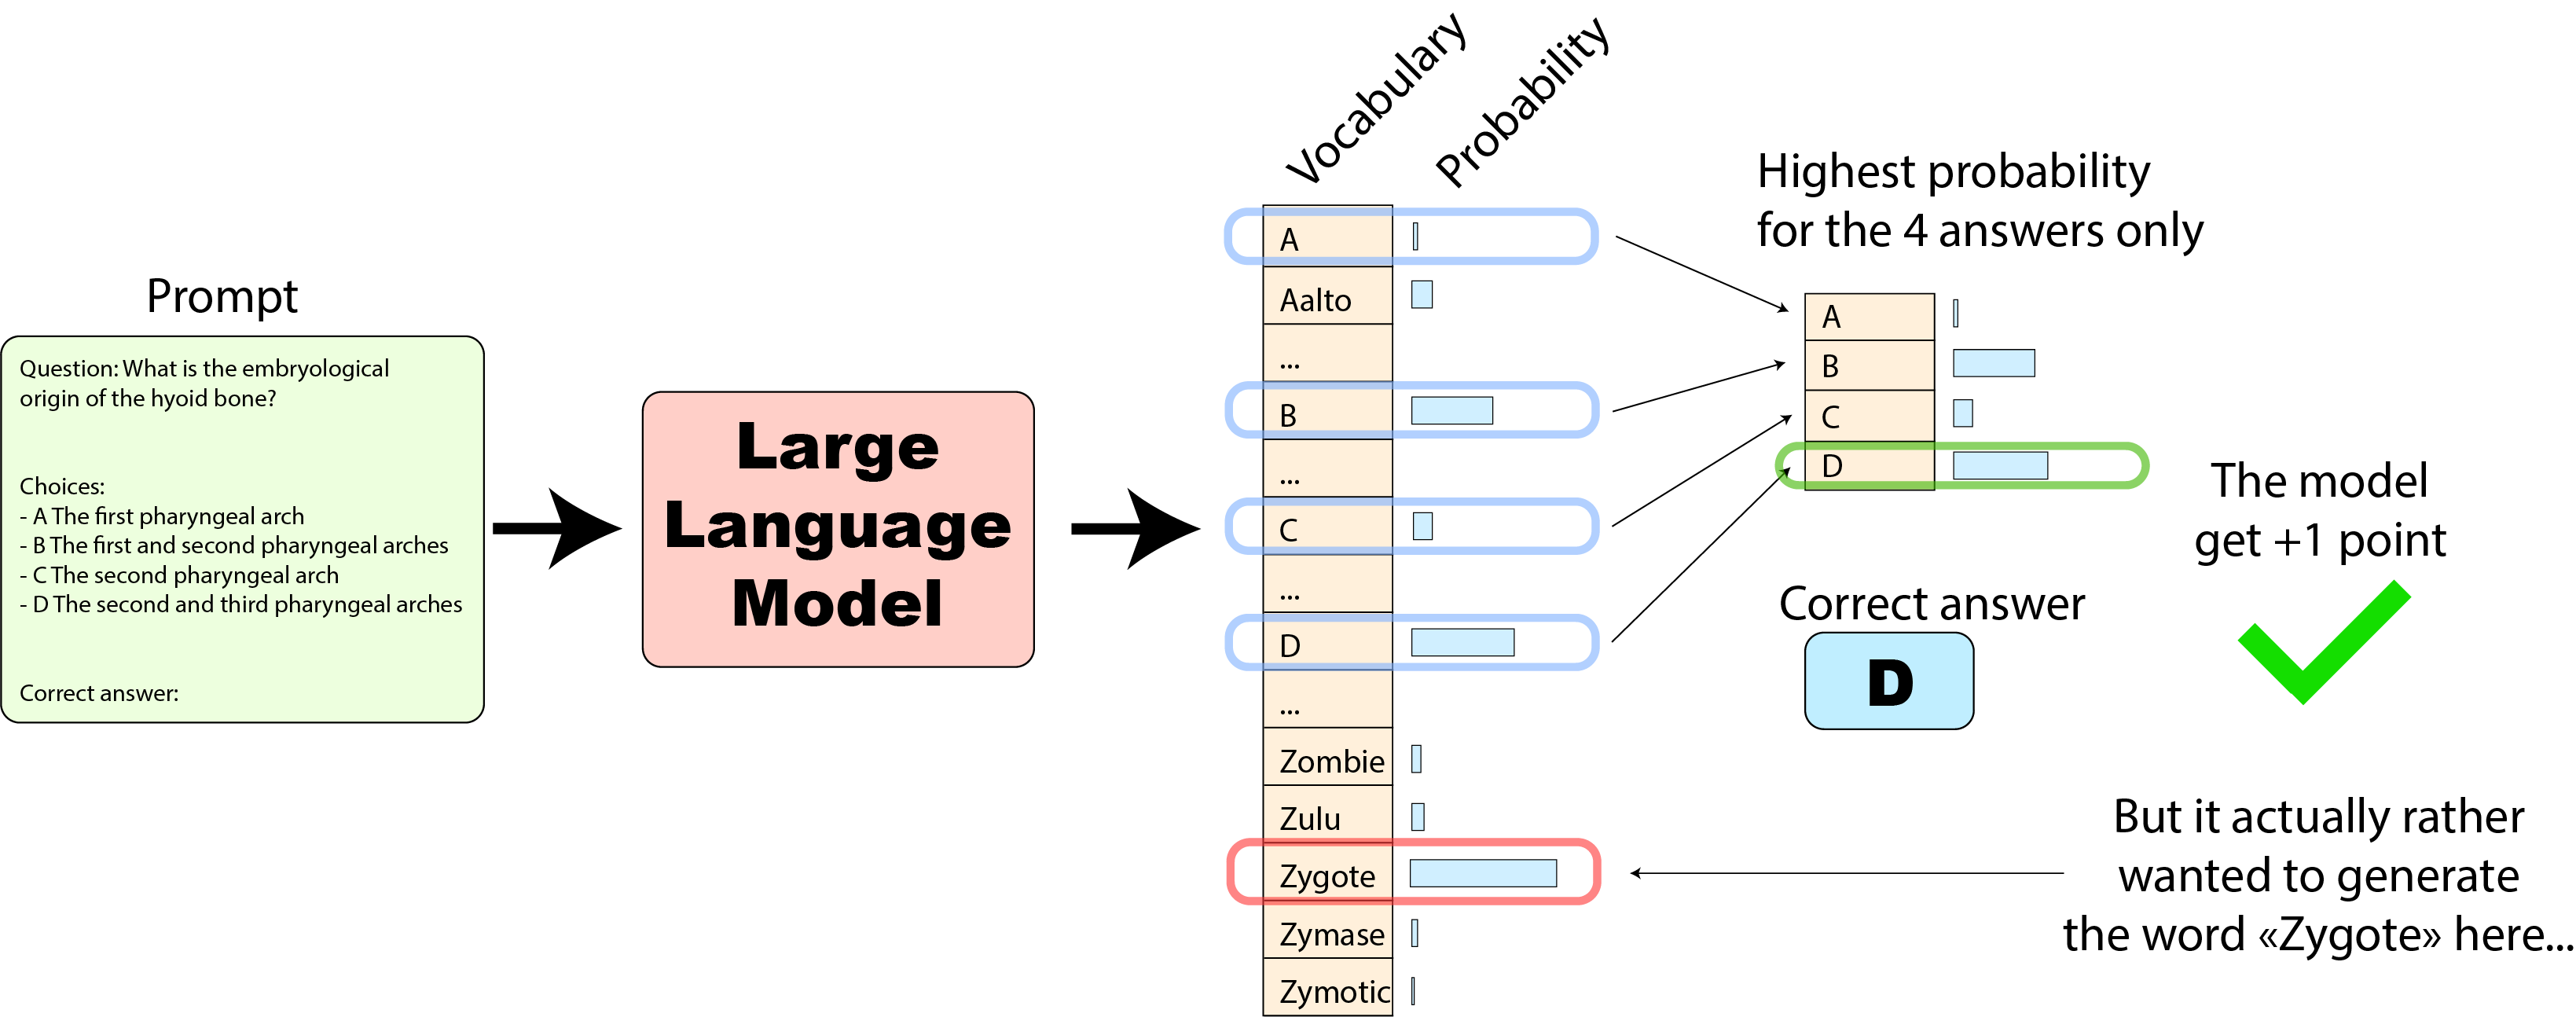

## Generative evaluations
For a generative evaluation, we want the text generated by the model given an input prompt.

It is obtained in an auto-regressive way: we pass the prompt to the model, look at the most likely next token, select it as being the model's "choice first token", then repeat until we reach an end of generation condition (maximum length, special token to stop the generation, etc). All the tokens generated by the model are consider its answer to the prompt.



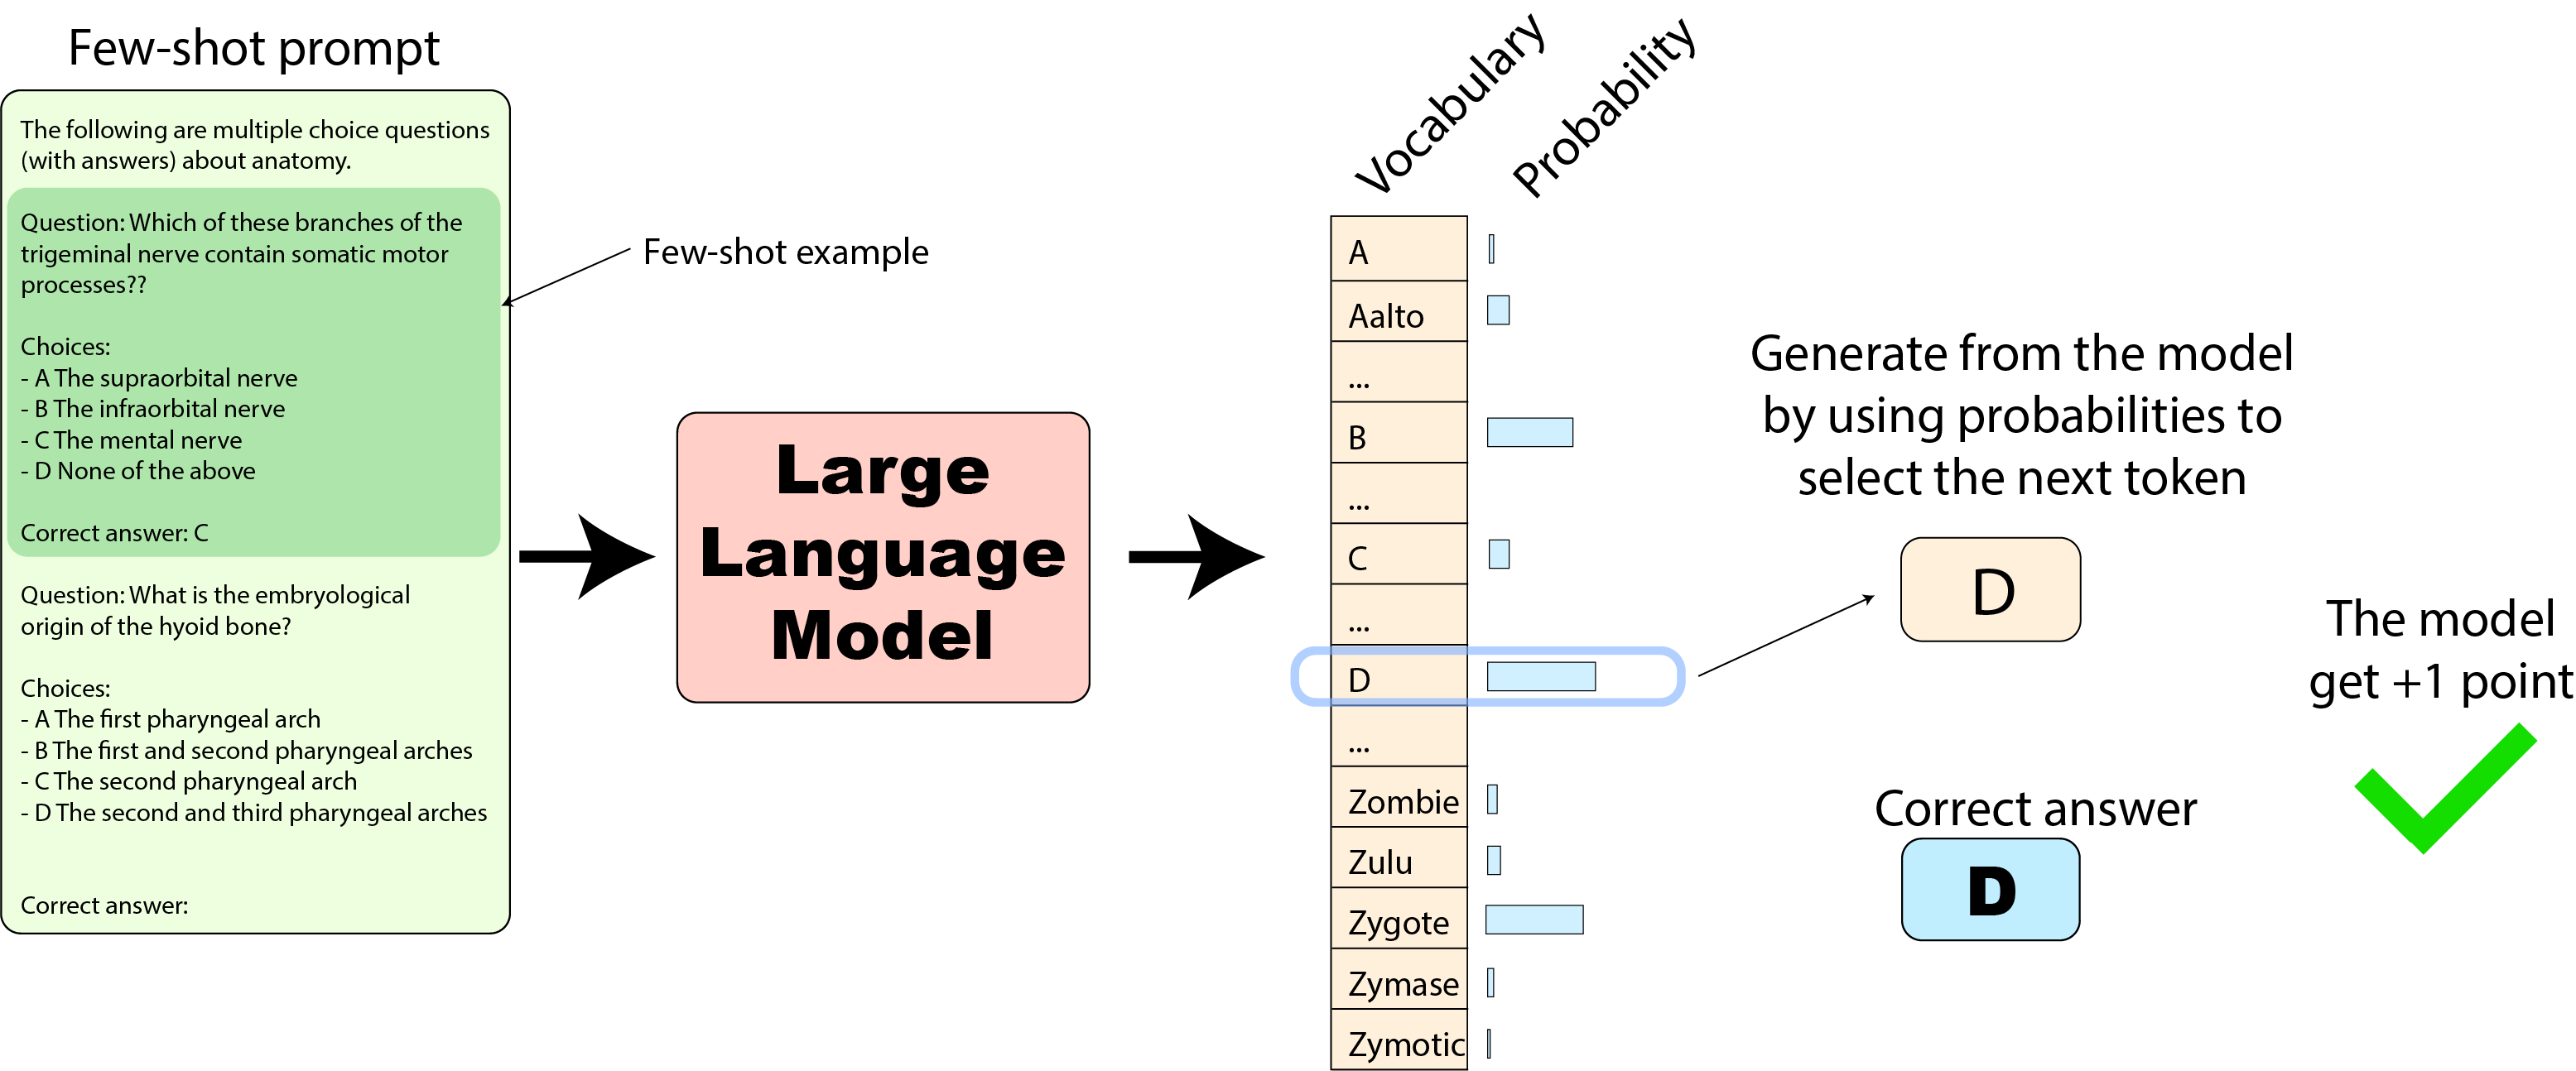

# Using human annotators

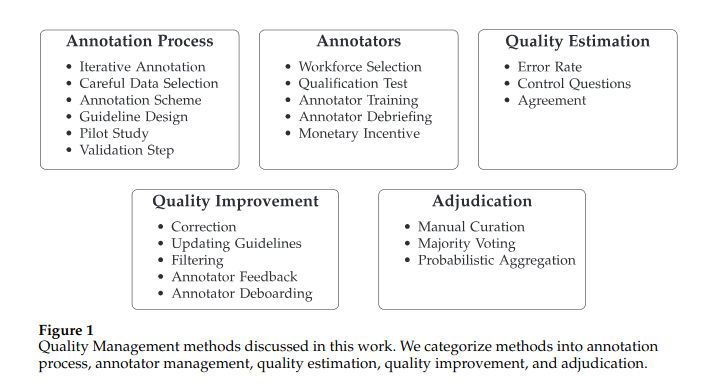

**Source:**

[Analyzing Dataset Annotation Quality Management in the Wild](https://aclanthology.org/2024.cl-3.1) (Klie et al., CL 2024)

# LLM As A Judge

Judge models are simply neural network used to evaluate the output of other neural networks. In most cases, they evaluate text generations.

Judge models range from small specialized classifiers (think "spam filter", but for toxicity for example) to LLMs, either large and generalist or small and specialized. In the latter case, when using an LLM as a judge, you give it a prompt to explain how to score models (ex: Score the fluency from 0 to 5, 0 being completely un-understandable, ...).

Model as judges allow to score text on complex and nuanced properties. For example, an exact match between a prediction and reference can allow you to test if a model predicted the correct fact or number, but assessing more open-ended empirical capabilities (like fluency, poetry quality, or faithfulness to an input) requires more complex evaluators.

That's where models as judges come into play.

They are used on 3 main tasks:

- Scoring a model generation, on a provided scale, to assess a property of the text (fluency, toxicity, coherence, persuasiveness, etc).
- Pairwise scoring: comparing a pair model outputs to pick the best text with respect to a given property
- Computing the similarity between a model output and a reference

**Pros and cons of using judge-LLMs**

Judge LLMs have been used for the following points:
- Objectivity when compared to humans: They automate empirical judgments in an objective and reproducible manner
- Scale and reproducibility: They are more scalable than human annotators, which allows to reproduce scoring on large amounts of data.
- Cost: They are cheap to instantiate, as they don't require to train a new model, and can just rely on good prompting and an existing high quality LLM. They are also cheaper than paying actual human annotators.
- Alignment with human judgments: They are somehow correlated with human judgments.

There are also downside to all of these:
- LLM as judges seem objective, but they have many hidden biases that can be harder to detect than the ones in humans, since we're not as actively looking for them. Besides, there are ways to reduce human bias by designing survey questions in specific and statistically robust ways (which has been studied in sociology for about a century), where LLM-prompting is not as robust yet. Using LLMs to evaluate LLMs has been compared to creating an echo-chamber effect, by reinforcing biases subtly.
- They are indeed scalable, but contribute to creating massive amounts of data which themselves need to be examined to ensure their quality (for example, you can improve the quality of LLM-judges by asking them to generate a thinking trace, or reasoning around their data, which makes even more new artificial data to analyse)
- They are indeed cheap to instantiate, but paying actual expert human annotators is likely to give you qualitatively better results for your specific use cases.

# [DeepEval - The Open Source LLM Evaluation Framework](https://docs.confident-ai.com/docs/getting-started)

DeepEval is an open-source framework designed to facilitate the evaluation of Large Language Models (LLMs). It enables developers to "unit test" LLM outputs, similar to how Pytest functions for traditional code, by providing a suite of metrics to assess various aspects of LLM-generated content.

**Key Features of DeepEval:**

- **Unit Testing for LLM Outputs:** Allows for systematic testing of LLM responses to ensure they meet specified criteria.
- **Diverse Evaluation Metrics:** Offers over 14 built-in metrics, including Answer Relevancy, Faithfulness, and Hallucination detection, many of which are backed by research.
- **Synthetic Dataset Generation:** Facilitates the creation of synthetic datasets using advanced evolution techniques to simulate various scenarios.
- **Customizable Metrics:** Enables users to tailor metrics to specific use cases, ensuring flexibility in evaluation.
- **Real-Time Production Evaluations:** Supports real-time assessments of LLM outputs in production environments.

**Getting Started with DeepEval:**

1. **Set Up a Python Environment:**
   - Navigate to your project's root directory and create a virtual environment:
     ```bash
     python3 -m venv venv
     source venv/bin/activate
     ```
   - Install DeepEval using pip:
     ```bash
     pip install -U deepeval
     ```

2. **Create Your First Test Case:**
   - Create a test file in your project directory:
     ```bash
     touch test_example.py
     ```
   - Open `test_example.py` and define a test case:
     ```python
     from deepeval import assert_test
     from deepeval.test_case import LLMTestCase
     from deepeval.metrics import AnswerRelevancyMetric

     def test_answer_relevancy():
         answer_relevancy_metric = AnswerRelevancyMetric(threshold=0.5)
         test_case = LLMTestCase(
             input="What if these shoes don't fit?",
             actual_output="We offer a 30-day full refund at no extra cost.",
             retrieval_context=["All customers are eligible for a 30 day full refund at no extra cost."]
         )
         assert_test(test_case, [answer_relevancy_metric])
     ```
   - Run the test:
     ```bash
     deepeval test run test_example.py
     ```
   - Ensure you set your `OPENAI_API_KEY` as an environment variable before running the `AnswerRelevancyMetric`, as it utilizes LLM-evaluated metrics.

3. **Develop Custom Metrics:**
   - DeepEval allows the creation of custom metrics using its G-Eval framework.
   - Example of defining a custom metric:
     ```python
     from deepeval.test_case import LLMTestCase, LLMTestCaseParams
     from deepeval.metrics import GEval

     test_case = LLMTestCase(input="...", actual_output="...", expected_output="...")
     correctness_metric = GEval(
         name="Correctness",
         criteria="Determine if the actual output is correct according to the expected output.",
         evaluation_params=[LLMTestCaseParams.ACTUAL_OUTPUT, LLMTestCaseParams.EXPECTED_OUTPUT],
         strict_mode=True
     )
     correctness_metric.measure(test_case)
     print(correctness_metric.score, correctness_metric.reason)
     ```

4. **Evaluate Multiple Metrics Simultaneously:**
   - To apply multiple metrics to a single test case:
     ```python
     def test_multiple_metrics():
         assert_test(test_case, [answer_relevancy_metric, correctness_metric])
     ```
   - Run the test:
     ```bash
     deepeval test run test_example.py
     ```

5. **Create Evaluation Datasets:**
   - An evaluation dataset is a collection of `LLMTestCase` instances.
   - Example of creating a dataset:
     ```python
     from deepeval.test_case import LLMTestCase
     from deepeval.dataset import EvaluationDataset

     test_case_1 = LLMTestCase(input="...", actual_output="...")
     test_case_2 = LLMTestCase(input="...", actual_output="...")
     dataset = EvaluationDataset(test_cases=[test_case_1, test_case_2])
     ```
   - Use Pytest to loop through and evaluate the dataset:
     ```python
     import pytest

     @pytest.mark.parametrize("test_case", dataset)
     def test_llm_responses(test_case: LLMTestCase):
         answer_relevancy_metric = AnswerRelevancyMetric(threshold=0.5)
         assert_test(test_case, [answer_relevancy_metric])
     ```

